### T-tests
#### Check if values are significantly different from each other

In [1]:
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
pl_events_path = '../wyscout_data/events/events_England.json'
teams_path = '../wyscout_data/teams.json'

with open(pl_events_path) as f:
    data = json.load(f)

pl_events_df = pd.DataFrame(data)

with open(teams_path) as f:
    data = json.load(f)

teams_df = pd.DataFrame(data)

In [3]:
pl_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643150 entries, 0 to 643149
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventId       643150 non-null  int64  
 1   subEventName  643150 non-null  object 
 2   tags          643150 non-null  object 
 3   playerId      643150 non-null  int64  
 4   positions     643150 non-null  object 
 5   matchId       643150 non-null  int64  
 6   eventName     643150 non-null  object 
 7   teamId        643150 non-null  int64  
 8   matchPeriod   643150 non-null  object 
 9   eventSec      643150 non-null  float64
 10  subEventId    643150 non-null  object 
 11  id            643150 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 58.9+ MB


In [4]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          142 non-null    object
 1   name          142 non-null    object
 2   wyId          142 non-null    int64 
 3   officialName  142 non-null    object
 4   area          142 non-null    object
 5   type          142 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


In [5]:
teams_df.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [6]:
teams_df = teams_df.rename(columns={'wyId':'teamId'})
teams_df.head()

,city,name,teamId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [7]:
pl_events_df['subEventName'].unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [8]:
corners = pl_events_df[pl_events_df['subEventName'] == 'Corner']
corners

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
84,3,Corner,[{'id': 1801}],8013,"[{'y': 0, 'x': 100}, {'y': 6, 'x': 91}]",2499719,Free Kick,1631,1H,247.134470,30,177959268
168,3,Corner,"[{'id': 801}, {'id': 1801}]",49876,"[{'y': 100, 'x': 100}, {'y': 34, 'x': 89}]",2499719,Free Kick,1609,1H,598.145995,30,177959342
517,3,Corner,[{'id': 1802}],49876,"[{'y': 0, 'x': 100}, {'y': 39, 'x': 93}]",2499719,Free Kick,1609,1H,1602.452184,30,177959747
785,3,Corner,[{'id': 1801}],49876,"[{'y': 100, 'x': 100}, {'y': 90, 'x': 91}]",2499719,Free Kick,1609,1H,2453.720850,30,177960011
794,3,Corner,[{'id': 1801}],49876,"[{'y': 0, 'x': 100}, {'y': 10, 'x': 90}]",2499719,Free Kick,1609,1H,2487.639981,30,177960022
...,...,...,...,...,...,...,...,...,...,...,...,...
642880,3,Corner,"[{'id': 801}, {'id': 1801}]",8239,"[{'y': 100, 'x': 100}, {'y': 32, 'x': 96}]",2500098,Free Kick,1623,2H,1729.679802,30,251596258
642934,3,Corner,"[{'id': 801}, {'id': 1801}]",70965,"[{'y': 0, 'x': 100}, {'y': 62, 'x': 93}]",2500098,Free Kick,1633,2H,1927.659469,30,251596046
642942,3,Corner,"[{'id': 801}, {'id': 1801}]",70965,"[{'y': 0, 'x': 100}, {'y': 56, 'x': 97}]",2500098,Free Kick,1633,2H,1967.737195,30,251596051
643058,3,Corner,"[{'id': 801}, {'id': 1801}]",9194,"[{'y': 100, 'x': 100}, {'y': 63, 'x': 77}]",2500098,Free Kick,1623,2H,2407.262944,30,251596361


In [9]:
# count corners by teams
corners_by_team = corners.groupby(['teamId']).size().reset_index(name='counts')
corners_by_team.head()

,teamId,counts
0,1609,225
1,1610,229
2,1611,217
3,1612,231
4,1613,166


In [10]:
team_corners = corners_by_team.merge(teams_df[['name', 'teamId']], how = 'left', on = 'teamId')
team_corners.head()

,teamId,counts,name
0,1609,225,Arsenal
1,1610,229,Chelsea
2,1611,217,Manchester United
3,1612,231,Liverpool
4,1613,166,Newcastle United


In [11]:
team_corners.sort_values(by = 'counts', ascending = False)

,teamId,counts,name
8,1625,285,Manchester City
7,1624,247,Tottenham Hotspur
3,1612,231,Liverpool
1,1610,229,Chelsea
5,1619,227,Southampton
0,1609,225,Arsenal
17,1659,218,AFC Bournemouth
2,1611,217,Manchester United
10,1628,209,Crystal Palace
11,1631,203,Leicester City


In [12]:
# count corners by teams by game
corners_by_game = corners.groupby(['teamId', 'matchId']).size().reset_index(name='counts')
corners_by_game.head()

,teamId,matchId,counts
0,1609,2499719,9
1,1609,2499735,9
2,1609,2499743,3
3,1609,2499749,10
4,1609,2499760,1


In [13]:
#merge with team name
game_corners = corners_by_game.merge(teams_df[["name", "teamId"]], how = "left", on = ["teamId"])
game_corners.head()

,teamId,matchId,counts,name
0,1609,2499719,9,Arsenal
1,1609,2499735,9,Arsenal
2,1609,2499743,3,Arsenal
3,1609,2499749,10,Arsenal
4,1609,2499760,1,Arsenal


#### One-sample, two-sample, or paired t test?
1. If the groups come from a **single population** (e.g., measuring before and after an experimental treatment), perform a paired t test. This is a within-subjects design.
2. If the groups come from **two different populations** (e.g., two different species, or people from two separate cities), perform a two-sample t test (a.k.a. independent t test). This is a between-subjects design.
3. If there is **one group being compared against a standard value** (e.g., comparing the acidity of a liquid to a neutral pH of 7), perform a one-sample t test.

### One-sample one-sided t-test

In [14]:
# plot distribution of Manchester City's corners
team_name = 'Manchester City'

man_city_corners = game_corners[game_corners['name'] == team_name]['counts']
man_city_corners

298    10
299     7
300     5
301     8
302    11
303     8
304     8
305     5
306     4
307     2
308     5
309     7
310     7
311     6
312    10
313     8
314     5
315     5
316     4
317     8
318     8
319     9
320     6
321    19
322     9
323    13
324     8
325     1
326     5
327    10
328     4
329    11
330     8
331     7
332     5
333     7
334    10
335    12
Name: counts, dtype: int64

In [15]:
man_city_corners.info()

<class 'pandas.core.series.Series'>
Index: 38 entries, 298 to 335
Series name: counts
Non-Null Count  Dtype
--------------  -----
38 non-null     int64
dtypes: int64(1)
memory usage: 608.0 bytes


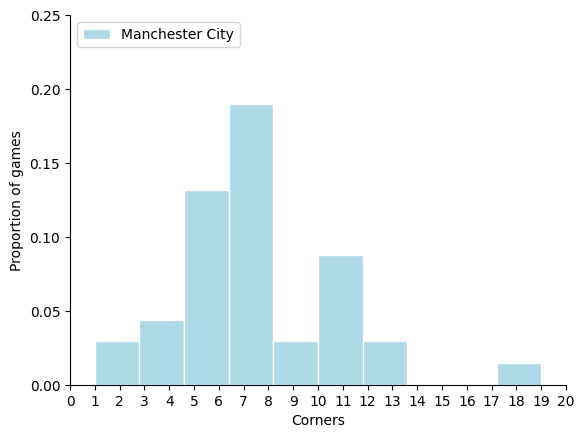

In [18]:
fig, ax1 = plt.subplots(1,1)

ax1.hist(man_city_corners, color='lightblue', edgecolor = 'white', linestyle='-', label=team_name, density=True)

ax1.legend(loc='upper left')
ax1.set_ylim(0,0.25)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Corners')
ax1.set_ylabel('Proportion of games')
ax1.set_xticks(np.arange(0,21,step=1))

In [16]:
mean = man_city_corners.mean()
std = man_city_corners.std()

print('City typically had %.2f plus/minus %.2f corners per match in the 2017/18 season.'%(mean,std))

City typically had 7.50 plus/minus 3.28 corners per match in the 2017/18 season.


### t-test

- t-value is **lesser** than the critical value -> don't reject null hypothesis
- t-value is **greater** than the critical value -> reject null hypothesis 

<!-- Total samples = 38
df = 38-2 = 36
For significance value = 0.05, check row from t-table where df = 36  -->

In [17]:
from scipy.stats import ttest_1samp

t, pvalue = ttest_1samp(man_city_corners, popmean=6)

print("The t-staistic is %.2f and the P-value is %.2f."%(t,pvalue))
if pvalue < 0.05:
    print("We reject null hypothesis thus " + team_name + " typically take more than 6 corners per match.")
else:
    print("We cannot reject null hypothesis thus " + team_name + " do not typically take more than 6 corners per match.")

The t-staistic is 2.82 and the P-value is 0.01.
We reject null hypothesis thus Manchester City typically take more than 6 corners per match.
